# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Введение в анализ данных" </center>

# <center> Лабораторная работа №1. Обработка и первичный анализ данных </center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [57]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

import pylab as pl
import numpy as np

In [58]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [59]:
data = pd.read_csv("students_data.csv")
data.shape

(1044, 36)

In [60]:
data.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [61]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


<br>  

## Задания

**NB:** Обратите внимание, что часть студентов посещают оба курса и представлены в данных два раза. Из-за этого некоторые результаты анализа могут быть искажены. Имеет смысл выявить таких студентов заранее ([Задание 11](#task11)) и учитывать эту информацию при анализе.

### Задание 1  
  
 * Для каждого признака определите, к какому типу он относится.   
 * Проверьте значения признаков на наличие опечаток и ошибок, исправьте их.<br>
   __Note:__ Исправлять ошибки нужно программно, модифицировать руками исходный файл нельзя.
 * При необходимости, приведите признак к определенному вами типу.

### 1 пункт, типы признаков
0. ID - числовой дискретный
1. Subject - бинарный категориальный
2. school - бинарный категориальный
3. sex - бинарный категориальный
4. age - числовой дискретный
5. address - бинарный категориальный
6. famsize - бинарный категориальный
7. Pstatus - бинарный категориальный
8. Medu - упорядоченный категориальный
9. Fedu - упорядоченный категориальный
10. Mjob - обычный категориальный
11. Fjob - обычный категориальный
12. reason - обычный категориальный
13. guardian - обычный категориальный
14. traveltime - упорядоченный категориальный
15. studytime - упорядоченный категориальный
16. failures - упорядоченный категориальный
17. schoolsup - бинарный категориальный
18. famsup - бинарный категориальный
19. paid - бинарный категориальный
20. activities - бинарный категориальный
21. nursery - бинарный категориальный
22. higher - бинарный категориальный
23. internet - бинарный категориальный
24. romantic - упорядоченный категориальный
25. famrel - упорядоченный категориальный
26. freetime - упорядоченный категориальный
27. goout - упорядоченный категориальный
28. Dalc - упорядоченный категориальный
29. Walc - упорядоченный категориальный
30. health - упорядоченный категориальный
31. absences - числовой дискретный
32. cheating - бинарный категориальный
33. G1 - числовой дискретный
34. G2 - числовой дискретный
35. G3 - числовой дискретный

In [64]:
# заменим NAN на среднее, где необходимо
# А cheating, где NAN сделаем "no", потому что, как говрится: "Не пойман - не вор!"
# В в 'romantic' заменяем на 'no', 
# так как люди, не ответившие на данный вопрос, 
# скорее всего не имеют отношений:)

data['famrel'].fillna(round(data['famrel'].mean()), inplace=True)
data['Dalc'].fillna(round(data['famrel'].mean()), inplace=True)
data['Walc'].fillna(round(data['famrel'].mean()), inplace=True)
data["romantic"].fillna("no", inplace=True)
data["cheating"].fillna("no", inplace=True)
# исправим ошибки
data.sex.replace("m", "M", inplace=True)
data.Pstatus.replace("t", "T", inplace=True)
data.replace("at-home", "at_home", inplace=True)
data.guardian.replace("futher", "father", inplace=True)
data.replace("no", False, inplace=True)
data.replace("yes", True, inplace=True)
data.replace("o", "0", inplace=True)

# заменим "неправильные" типы
data['Medu'] = data['Medu'].apply(pd.to_numeric, errors='coerce', downcast='integer')
data['Fedu'] = data['Fedu'].apply(pd.to_numeric, errors='coerce', downcast='integer')
data['famrel'] = data.famrel.astype('int64')
data['Dalc'] = data.Dalc.astype('int64')
data['Walc'] = data.Walc.astype('int64')

### Задание 2  
  
Проверьте, присутствуют ли в данных пропущенные значения. Сколько? В каких признаках?  
По каждому такому признаку предложите и обоснуйте, что делать с пропущенными значениями.

In [65]:
data.isna().sum()
# Как видно, пропущенных значений больше нет, потому что всех их мы уже обработали на предыдущем этапе...

ID            0
Subject       0
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
cheating      0
G1            0
G2            0
G3            0
dtype: int64

### Задание 3  
  
Проанализируйте данные на наличие выбросов.   
Сколько наблюдений можно отнести к выбросам по каждому признаку? Сколько всего выбросов в данных?  
  
**Note:** Выбросы можно не удалять из данных. Это информацию можно учитывать в дальнейшем анализе и удалять выбросы при необходимости. 

In [40]:
# выбросыыы

### Задание 4 
  
* Посчитайте описательные статистики для числовых и для категориальных признаков. 
* Сколько студентов посещают каждую из школ?  
* Сколько студентов посещают математику, сколько - португальский?  
* Студенты какого курса чаще заваливают экзамены?  
* Сколько в среднем времени в неделю уходит на учебу по каждому предмету?  
* На что чаще обращают внимание при выборе школы?

#### Запускаем сначала 10 задание, ведь выполнять третье иначе будет некорректно

In [ ]:
# 10-е задание

### Задание 4.1
Посчитайте описательные статистики для числовых и для категориальных признаков.

In [69]:
data.describe(include="all")

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
count,1044.000000,1044,1044,1044,1044.000000,1044,1044,1044,1044.000000,1044.000000,1044,1044,1044,1044,1044.000000,1044.000000,1044.000000,1044,1044,1044,1044,1044,1044,1044,1044,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044,1044.000000,1044.000000,1044.000000
unique,NaN,2,2,2,NaN,2,2,2,NaN,NaN,5,5,4,3,NaN,NaN,NaN,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
top,NaN,Por,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,course,mother,NaN,NaN,NaN,False,True,False,False,True,True,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
freq,NaN,649,772,591,NaN,759,738,923,NaN,NaN,399,584,430,728,NaN,NaN,NaN,925,640,824,528,835,955,827,674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,869,NaN,NaN,NaN
mean,547057.190613,NaN,NaN,NaN,16.726054,NaN,NaN,NaN,2.603448,2.387931,NaN,NaN,NaN,NaN,1.522989,1.970307,0.264368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.936782,3.201149,3.156130,1.521073,2.307471,3.543103,4.434866,NaN,11.213602,11.246169,11.341954
std,263827.330362,NaN,NaN,NaN,1.239975,NaN,NaN,NaN,1.124907,1.099938,NaN,NaN,NaN,NaN,0.731727,0.834353,0.656142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.928833,1.031507,1.152575,0.942517,1.292467,1.424703,6.210017,NaN,2.983394,3.285071,3.864796
min,100097.000000,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000
25%,324017.500000,NaN,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,NaN,9.000000,9.000000,10.000000
50%,554339.500000,NaN,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,NaN,11.000000,11.000000,11.000000
75%,774486.000000,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,NaN,13.000000,13.000000,14.000000


### Задание 4.2
Сколько студентов посещают каждую из школ?

In [72]:
data['school'].value_counts()

GP    772
MS    272
Name: school, dtype: int64

### Задание 4.3
Сколько студентов посещают математику, сколько - португальский?

In [73]:
data['Subject'].value_counts()

Por     649
Math    395
Name: Subject, dtype: int64

### Задание 4.4
Студенты какого курса чаще заваливают экзамены?

In [91]:
por_fail_count = pd.DataFrame(data.loc[(data['Subject'] == 'Por') & 
                                      (data['failures'] > 0)])['failures'].sum()
math_fail_count = pd.DataFrame(data.loc[(data['Subject'] == 'Math') & 
                                       (data['failures'] > 0)])['failures'].sum()
print("Por: ", por_fail_count, "\nMath: ", math_fail_count)
if por_fail_count > math_fail_count:
    print("Чаще студенты португальского заваливают экзамены!")
elif por_fail_count < math_fail_count:
    print("Чаще студенты матаматики заваливают экзамены!")
else:
    print("И те хороши и другие!")

Por:  144 
Math:  132
Чаще студенты португальского заваливают экзамены!


### Задание 4.5
Сколько в среднем времени в неделю уходит на учебу по каждому предмету?

In [97]:
por_time = pd.DataFrame(data.loc[(data['Subject'] == 'Por')]
                                          )['studytime'].mean()
math_time = pd.DataFrame(data.loc[(data['Subject'] == 'Math')]
                                           )['studytime'].mean()
def print_average(subject):
    av = "Среднее время занятия: "
    if float(subject) <= 1.0:
        return av + 'меньше 2 часов в неделю'
    elif 1.0 < float(subject) <= 2.0:
        return av + 'от 2 до 5 часов в неделю'
    elif 2.0 < float(subject) <= 3.0:
        return av + 'от 5 до 10 часов в неделю'
    else:
        return av + 'больше 10 часов в неделю'
print("Por: ", print_average(por_time))
print("Math: ", print_average(math_time))

Por:  Среднее время занятия: от 2 до 5 часов в неделю
Math:  Среднее время занятия: от 5 до 10 часов в неделю


### Задание 4.6
На что чаще обращают внимание при выборе школы?

In [81]:
reason = data['reason'].describe().to_list()[2]
print("чаще обращают внимание при выборе школы на: " + reason)

чаще обращают внимание при выборе школы на: course


### Задание 5  
  
Оцените распределение оценок (отдельно для `G1`, `G2` и `G3`). Сравните распределения для разных предметов - математики и португальского языка. Сделайте выводы.  
  
**Tip:** Для выполнения задания пригодятся графики плотности, гистограммы и боксплоты.

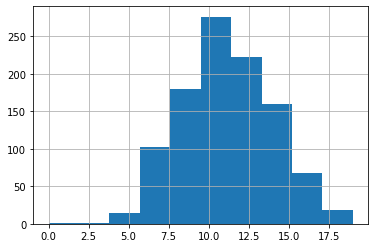

In [98]:
h = data['G1'].hist()
fig = h.get_figure()

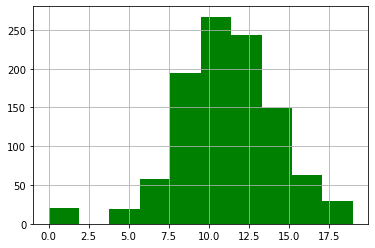

In [99]:
h = data['G2'].hist(color = 'green')
fig = h.get_figure()

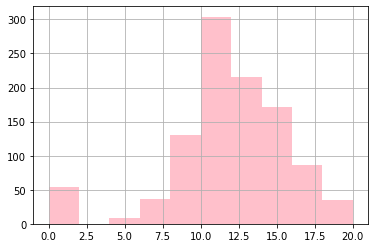

In [100]:
h = data['G3'].hist(color = 'pink')
fig = h.get_figure()

In [106]:
def print_plot(m_num: str):
    g1_math = data_Math[m_num]
    g1_por = data_Por[m_num]

    fig = plt.figure(figsize=(15,8),)
    ax=sns.kdeplot(g1_math, color='gray',shade=True,label='math')
    ax=sns.kdeplot(g1_por, color='green',shade=True, label='portugal')
    plt.title(f'Marks({m_num}) Distribution Math vs Portugal', fontsize = 25, pad = 40)
    plt.ylabel("Frequency", fontsize = 15, labelpad = 20)
    plt.xlabel(f"Marks({m_num})", fontsize = 15, labelpad = 20)
    plt.legend(fontsize = 15)
    plt.show()

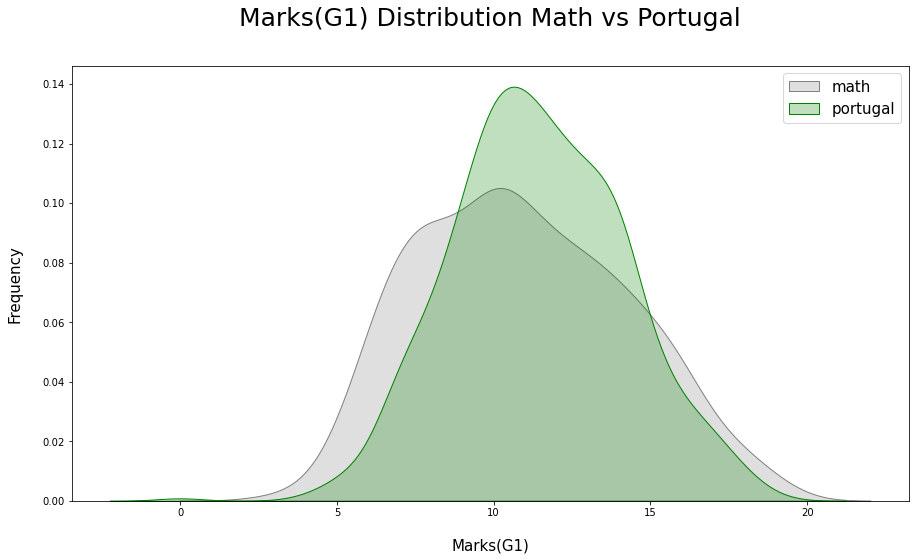

In [107]:
print_plot("G1")

Выводы: наиболее частая оценка за первое полугодие среди студентов на курсе португальского составляет примерно 11, у "математиков" - примерно 10-11, чуть-чуть поменьше. Не удовлетворительные оценки (от 0 до 8) получали чаще "математики", от 8 до 15 - "португальцы", от 15 до 20 - опять с математического курса.

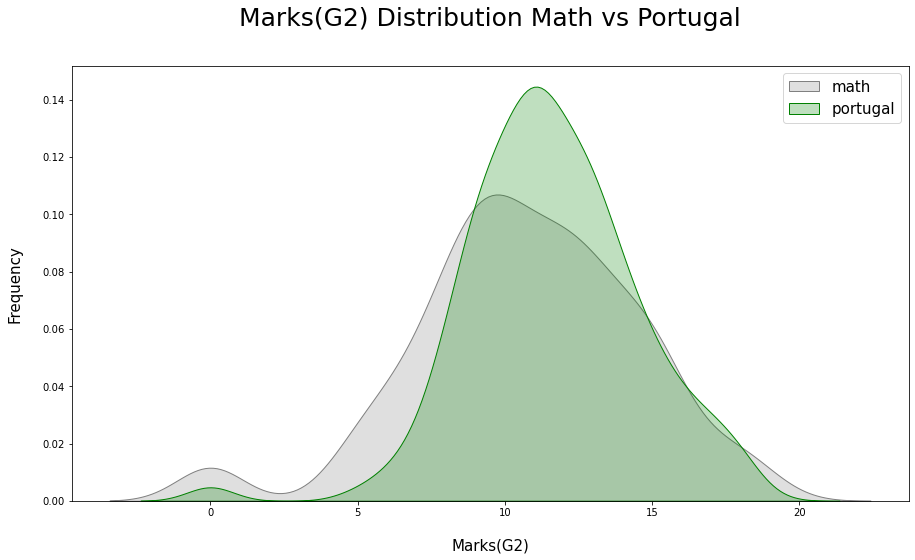

In [108]:
print_plot("G2")

Выводы: наиболее частая оценка за второе полугодие среди студентов на курсе португальского составляет примерно 11-12, у "математиков" - примерно 9-10. Оценки от 0 до 9 получали чаще "математики", от 9 до 14 - "португальцы", от 14 до 20 примерно одинаковое количесво человек с двух курсов. Примечательно, что оценку 0 ровно во втором полугодии получило больше человек по сравнению с первым.

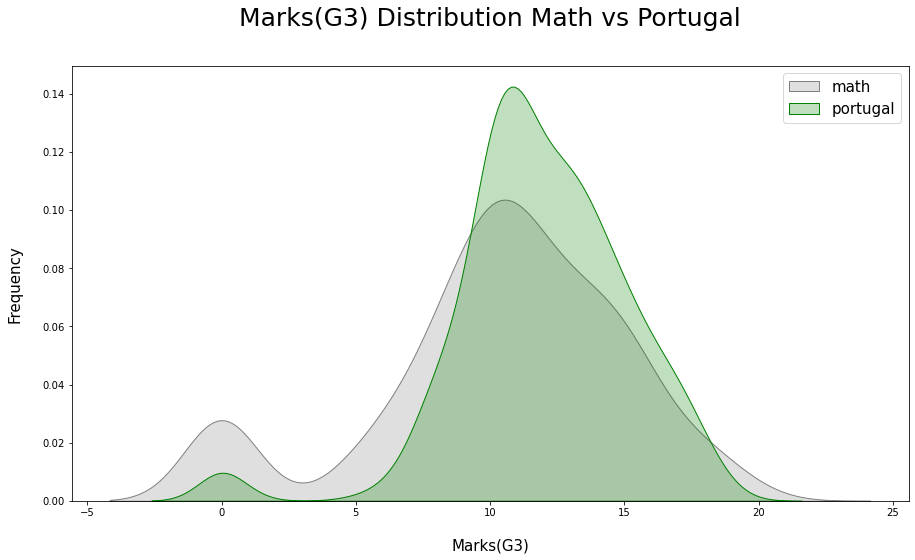

In [109]:
print_plot("G3")

Выводы: наиболее частая итоговая оценка среди студентов на курсе португальского составляет 11, у "математиков" - примерно 10-11, чуть поменьше. Оценки от 0 до 9 получали чаще "математики", от 9 до 18 - "португальцы", от 18 до 20 - опять с математического курса. Примечательно, что оценка 0 ровно является довольно популярной среди студентов, особенно "математиков".

### Задание 6 
  
Оцените попарные зависимости числовых признаков.  
Рассчитайте и провизуализируйте матрицу корреляций. Дайте содержательный комментарий.

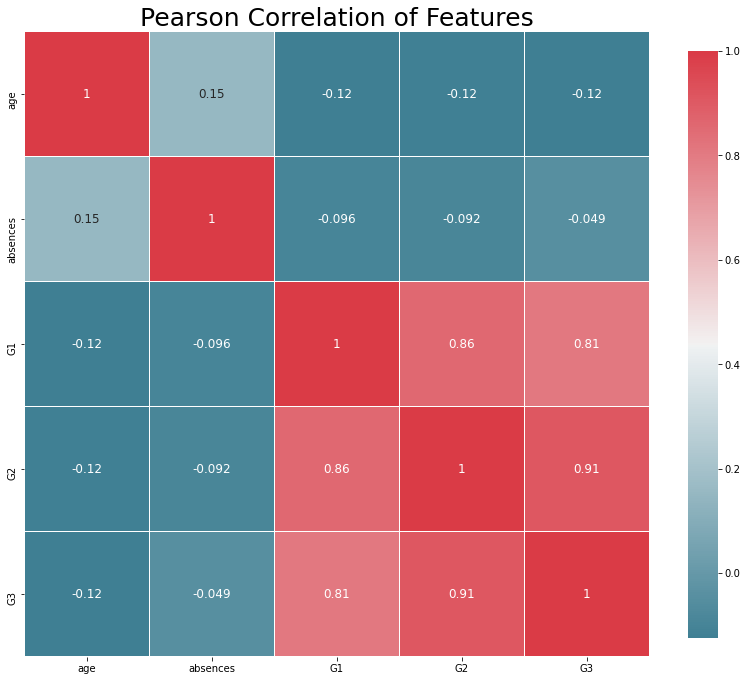

In [111]:
d_num = pd.DataFrame({})
d_num['age'] = df_no_repeat['age']
d_num['absences'] = df_no_repeat['absences']
d_num['G1'] = df_no_repeat['G1']
d_num['G2'] = df_no_repeat['G2']
d_num['G3'] =df_no_repeat['G3']

def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    plt.ylim((d_num.corr().shape[0], 0))
    plt.title('Pearson Correlation of Features', size=25)

correlation_heatmap(d_num)

Признаки, на пересечении которых находится красный квадрат, - взаимосвязаны, и можно предсказать поведение одного через другой.
Близкий к нулю коэффициент(голубые квадраты) корреляции же говорит о практически независимости данных признаков.
В данном случае четко показано, что, например, итоговая оценка зависит от оценок за первое и второе полугодия.

### Задание 7  
  
Оцените попарные зависимости нечисловых (категориальных) признаков, дайте содержательный комментарий. 

In [112]:
data_describe = df_no_repeat.describe(include=[object])
categorical_columns = [c for c in df_no_repeat.columns if df_no_repeat[c].dtype.name == 'object']

non_data = pd.DataFrame(df_no_repeat[categorical_columns])
non_data['Fedu'] = non_data.Fedu.astype('int64')
non_data['Medu'] = non_data.Medu.astype('int64')
categorical_columns.remove('Medu')
categorical_columns.remove('Fedu')
for c in categorical_columns:
    q = range(1, 1 + non_data[c].describe(include=[object])['unique'])
    unique = dict(zip(non_data[c].unique(), q))
    tmp = non_data[c].values.tolist()
    if (q[-1] == 2) & ((tmp[0] == 'no') | (tmp[0] == 'yes')):
        yes_no = {'yes': 1, 'no': 0}
        non_data[c] = df_no_repeat[c].map(yes_no)
    else:
        for i in range(len(tmp)):
            tmp[i] = unique[tmp[i]]
        non_data[c] = pd.DataFrame(tmp)

non_data[['traveltime', 'studytime', 'failures', 'famrel','freetime', 
          'goout', 'Dalc', 'Walc']] = data_no_rep[['traveltime', 
        'studytime', 'failures', 'famrel','freetime','goout', 'Dalc', 'Walc']]

corr = non_data.corr()
plt.figure(figsize = (20,15))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap = 'Blues')

AttributeError: 'DataFrame' object has no attribute 'Fedu'

### Задание  8  
  
* Оцените, есть ли разница в употреблении алкоголя между парнями и девушками. Кто пьет больше?
* Оцените связь употребления алкоголя с признаками: address, Pstatus, higher, romantic, freetime. 
* Оцените связь употребления алкоголя с уровнем образования опекуна (для случаев, где это известно).
* Сравните употребление алкоголя для 50 лучших учеников и 50 худших (по `G3`). Выполните сравнение отдельно для каждого предмета (`Math` и `Por`). Дайте содержательный комментарий.  
  
**Tip:** для выполнения задания пригодятся боксплоты и гистограммы. 

In [13]:
# your code here

### Задание 9     
  
Оцените зависимость итоговой оценки от следующих признаков: 
  
* Пола
* Времени в пути от дома до школы
* Наличия дополнительной помощи в учебе (от членов семьи или вообще)
* Посещения платных дополнительных занятий
* Наличия интернета
* Наличия романтических отношений
* Употребления алкоголя  

In [14]:
# your code here

### Задание 10  
  
Добавьте в данные новый признак - итоговая оценка по 4-х балльной шкале:  

* Отлично: 18 <= `G3` <= 20
* Хорошо: 14 <= `G3` <= 17
* Удовлетворительно: 8 <= `G3` <= 13
* Неудовлетворительно: `G3` < 8  
  
Оцените распределение нового признака в зависимости от признака `reason` (причина выбора школы). Дайте содержательный комментарий. 

In [15]:
# your code here

### Задание  11 <a id="task11"></a>  
  
Часть из представленных в данных студентов посещали оба курса - `Math` и `Por`.  
* Предложите способ идентификации студентов и определите тех, кто посещал оба курса. Сколько таких студентов?  
* Для этих студентов сравните оценки по двум предметам, дайте комментарий.  
  
**Note:** Столбец `ID` является уникальным идентификатором наблюдения, но не студента. Он будет уникален для каждой строки.

In [16]:
# your code here

### Задание 12  
  
Предложите простую модель для определения (предсказания) итоговой оценки студента по 4-х балльной системе. Оцените точность предложенной модели. 

In [17]:
# your code here

### Задание * (бонусное)  
  
Дополнительное исследование данных и выводы положительно скажутся на оценке. 

In [18]:
# your code here